![Graph](https://www.geeksforgeeks.org/wp-content/uploads/Fig-11.jpg)

In [1]:
import sys
sys.maxsize

9223372036854775807

In [2]:
2**(64-1)-1

9223372036854775807

In [24]:
# Python program for Dijkstra's single
# source shortest path algorithm. The program is
# for adjacency matrix representation of the graph
 
# Library for INT_MAX
import sys
 
class Graph():
 
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                    for row in range(vertices)]
 
    def printSolution(self, dist):
        print("Vertex \tDistance from Source")
        for node in range(self.V):
            print(node, "\t", dist[node])
 
    # A utility function to find the vertex with
    # minimum distance value, from the set of vertices
    # not yet included in shortest path tree
    # hint: we can optimize this part
    def minDistance(self, dist, sptSet):
 
        # Initialize minimum distance for next node
        min = sys.maxsize
 
        # Search not nearest vertex not in the
        # shortest path tree
        for u in range(self.V):
            if dist[u] < min and sptSet[u] == False:
                min = dist[u]
                min_index = u
 
        return min_index
 
    # Function that implements Dijkstra's single source
    # shortest path algorithm for a graph represented
    # using adjacency matrix representation
    def dijkstra(self, src):
 
        dist = [sys.maxsize] * self.V
        dist[src] = 0  # this means that the src will be found by the code below
        sptSet = [False] * self.V
 
        for cout in range(self.V):
 
            # Pick the minimum distance vertex from
            # the set of vertices not yet processed.
            # x is always equal to src in first iteration
            x = self.minDistance(dist, sptSet)
 
            # Put the minimum distance vertex in the
            # shortest path tree
            sptSet[x] = True
 
            # Update dist value of the adjacent vertices
            # of the picked vertex only if the current
            # distance is greater than new distance and
            # the vertex in not in the shortest path tree
            for y in range(self.V):
                if self.graph[x][y] > 0 and sptSet[y] == False and \
                dist[y] > dist[x] + self.graph[x][y]:
                        dist[y] = dist[x] + self.graph[x][y]
 
        self.printSolution(dist)
        return dist
 
# Driver program
# we use a adjacency matrix representation
g = Graph(9)
g.graph = [[0, 4, 0, 0, 0, 0, 0, 8, 0],
           [4, 0, 8, 0, 0, 0, 0, 11, 0],
           [0, 8, 0, 7, 0, 4, 0, 0, 2],
           [0, 0, 7, 0, 9, 14, 0, 0, 0],
           [0, 0, 0, 9, 0, 10, 0, 0, 0],
           [0, 0, 4, 14, 10, 0, 2, 0, 0],
           [0, 0, 0, 0, 0, 2, 0, 1, 6],
           [8, 11, 0, 0, 0, 0, 1, 0, 7],
           [0, 0, 2, 0, 0, 0, 6, 7, 0]
        ];
 
solution = g.dijkstra(0);
 
# This code is contributed by Divyanshu Mehta and Updated by Pranav Singh Sambyal

Vertex 	Distance from Source
0 	 0
1 	 4
2 	 12
3 	 19
4 	 21
5 	 11
6 	 9
7 	 8
8 	 14


In [25]:
solution

[0, 4, 12, 19, 21, 11, 9, 8, 14]

In [ ]:
sys.maxsize # 64bit signed infinity :)

9223372036854775807

In [ ]:
2**63

9223372036854775808

In [5]:
    # Driver program
g = Graph(4)
g.graph =   [[0, 4, 0, 0],
             [4, 0, 8, 2],
             [0, 8, 0, 7],
             [0, 2, 7, 0],
         ];
  
g.dijkstra(0);

Vertex 	Distance from Source
0 	 0
1 	 4
2 	 12
3 	 6


In [6]:
g.dijkstra(3)

Vertex 	Distance from Source
0 	 6
1 	 2
2 	 7
3 	 0


In [7]:
import networkx as nx
G = nx.Graph()

In [8]:
import matplotlib.pyplot as plt


In [9]:
G = nx.petersen_graph() # https://en.wikipedia.org/wiki/Petersen_graph useful for counterexamples

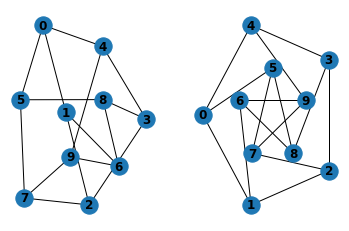

In [10]:
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')


![Graph](https://www.geeksforgeeks.org/wp-content/uploads/Fig-11.jpg)

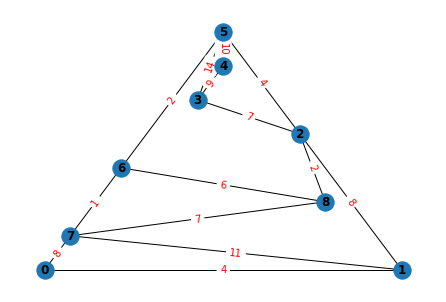

In [16]:
G = nx.Graph()  # initialize an empty networkx Graph
G.add_weighted_edges_from([(0,1,4),(0,7,8),(2,8,2),
                           (7,6,1),(8,6,6),
                           (6,5,2),(5,4,10),(7,8,7),
                           (7,1,11),(1,2,8),(2,3,7),(2,5,4),(3,5,14),(4,3,9)])
# pos=nx.shell_layout(G)
# https://networkx.org/documentation/stable/reference/drawing.html
pos=nx.planar_layout(G)
nx.draw(G, pos=pos, with_labels=True, font_weight='bold') 
# so we had to pass pos to the draw method that uses matplotlib underneath
edge_labels = nx.get_edge_attributes(G,'weight') # key is edge, pls check for your case
formatted_edge_labels = {(elem[0],elem[1]):edge_labels[elem] for elem in edge_labels} # use this to modify the tuple keyed dict if it has > 2 elements, else ignore
out = nx.draw_networkx_edge_labels(G,pos,edge_labels=formatted_edge_labels,font_color='red')

In [12]:
pos

{0: array([-1.00000000e+00, -8.74227766e-08]),
 1: array([-0.76604432, -0.64278775]),
 7: array([-0.17364813, -0.98480779]),
 2: array([ 0.49999991, -0.86602545]),
 8: array([ 0.93969256, -0.34202036]),
 6: array([0.93969256, 0.34202024]),
 5: array([0.49999961, 0.86602563]),
 4: array([-0.17364848,  0.98480767]),
 3: array([-0.76604456,  0.64278752])}

In [ ]:
type(out)

dict

In [17]:
length, path = nx.single_source_dijkstra(G, 0)

In [21]:
type(length)

dict

In [19]:
length

{0: 0, 1: 4, 7: 8, 6: 9, 5: 11, 2: 12, 8: 14, 3: 19, 4: 21}

In [23]:
import pandas as pd
df = pd.DataFrame(length.items(), columns=["vertex", "cost"])
df

,vertex,cost
0,0,0
1,1,4
2,7,8
3,6,9
4,5,11
5,2,12
6,8,14
7,3,19
8,4,21


In [26]:
df["og_cost"] = solution
df # so looks the solution is the same just that our nodes are of different numbering

,vertex,cost,og_cost
0,0,0,0
1,1,4,4
2,7,8,12
3,6,9,19
4,5,11,21
5,2,12,11
6,8,14,9
7,3,19,8
8,4,21,14


In [27]:
# we can compare two columns using regular Python (there might a Pandas way too)
# so sorting is useful
sorted(df.cost.to_list()) == sorted(df.og_cost.to_list())

True